                Forked  Repositories
Forked        1.000000      0.880969
Repositories  0.880969      1.000000
              Repositories  Starred
Repositories       1.00000 -0.03383
Starred           -0.03383  1.00000
              Followers  Repositories
Followers      1.000000     -0.027191
Repositories  -0.027191      1.000000
              Following  Repositories
Following      1.000000     -0.049159
Repositories  -0.049159      1.000000
              Repositories  Years_Active
Repositories      1.000000      0.243582
Years_Active      0.243582      1.000000
               LangCnt  Repositories
LangCnt       1.000000      0.581837
Repositories  0.581837      1.000000
               Contributions  Repositories
Contributions       1.000000      0.116826
Repositories        0.116826      1.000000
                Forked  Repositories
Forked        1.000000      0.880969
Repositories  0.880969      1.000000
           Forked   Starred
Forked   1.000000 -0.024488
Starred -0.024488  1.00

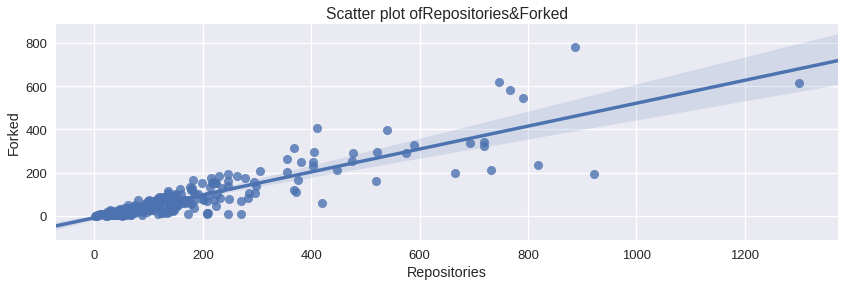

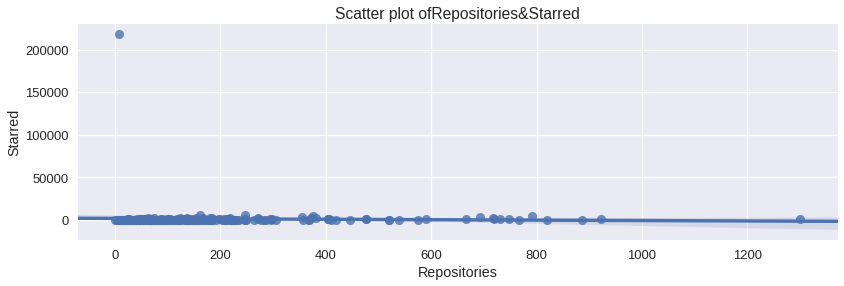

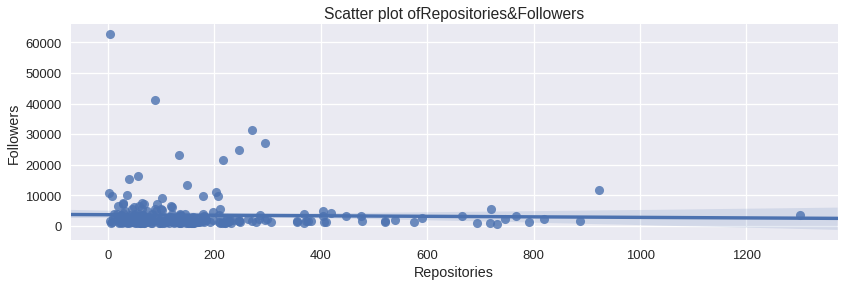

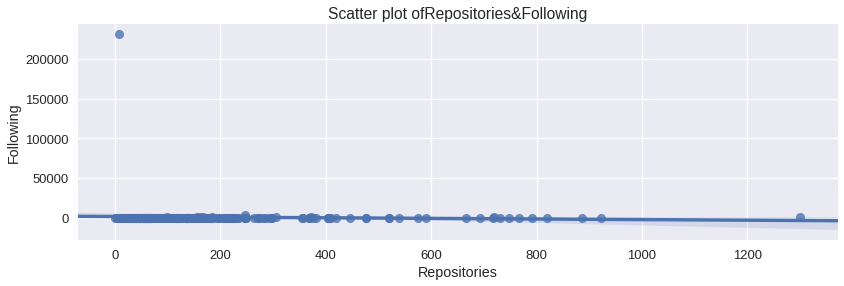

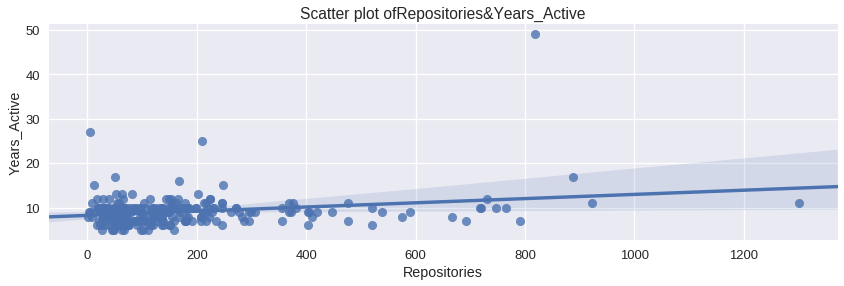

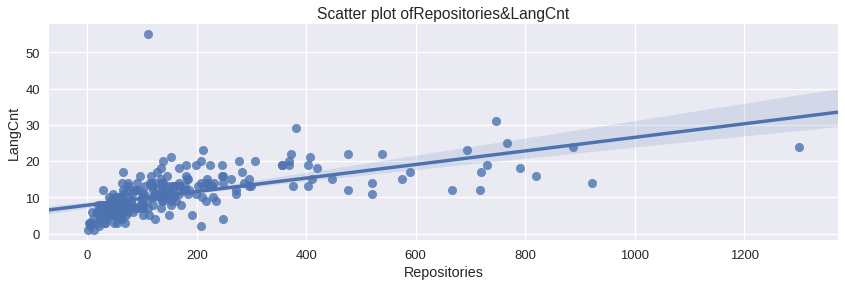

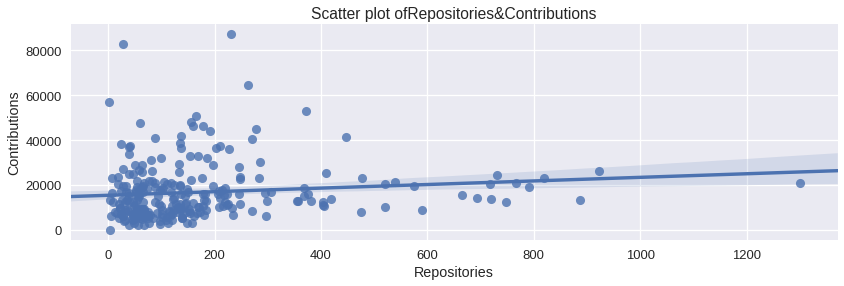

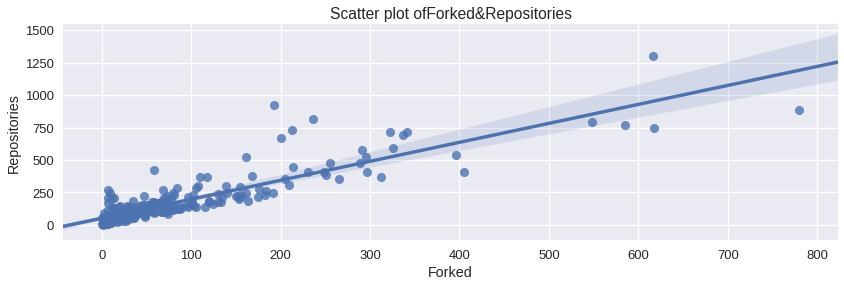

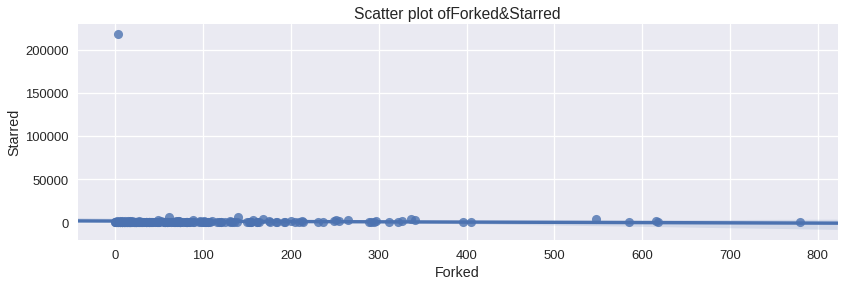

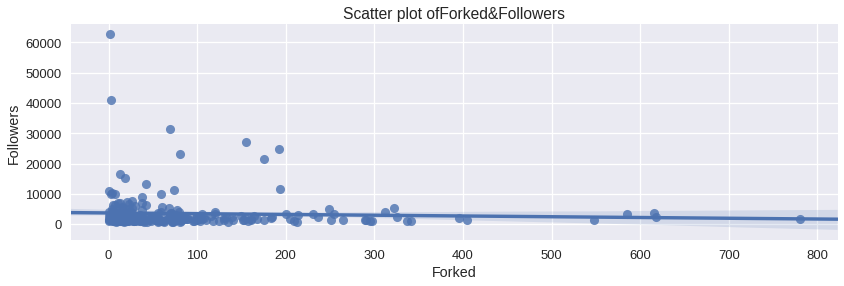

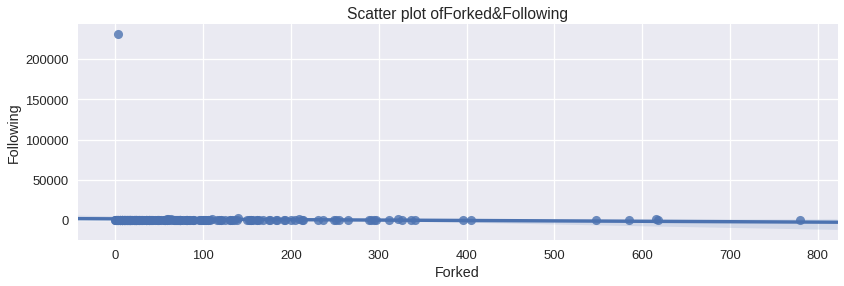

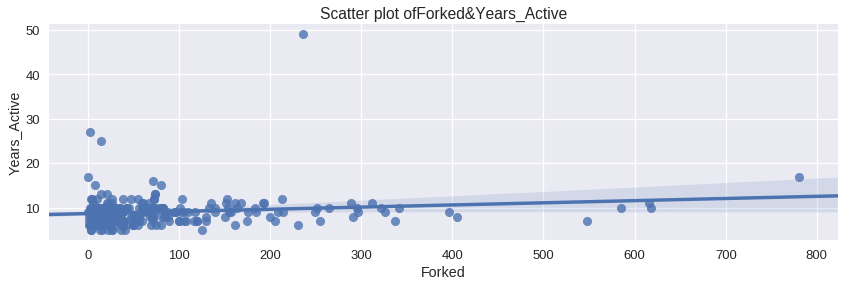

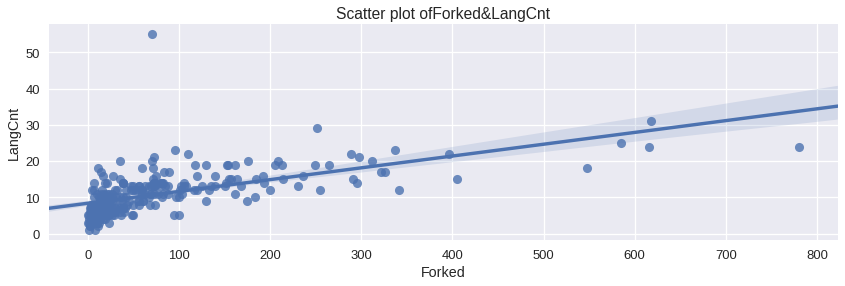

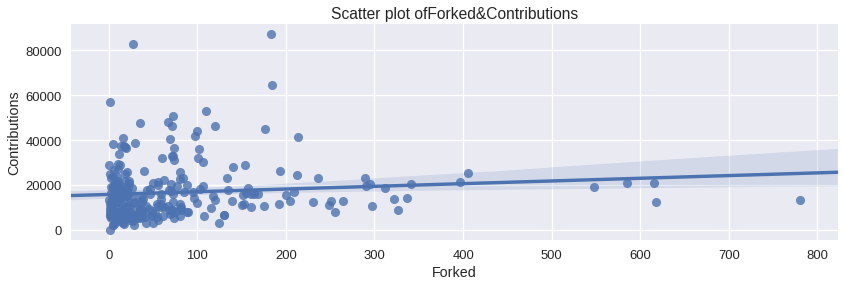

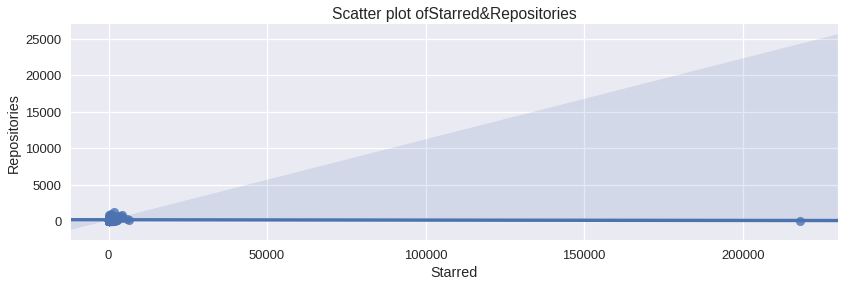

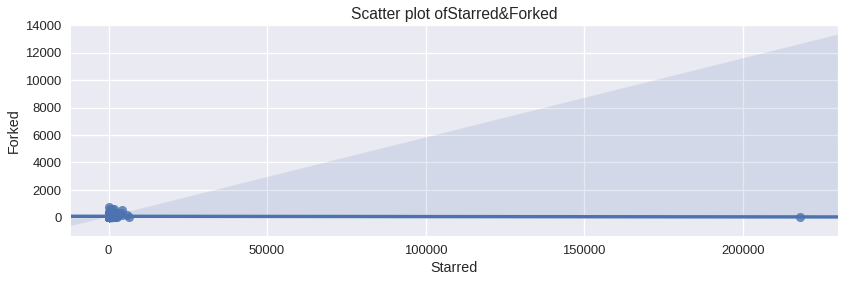

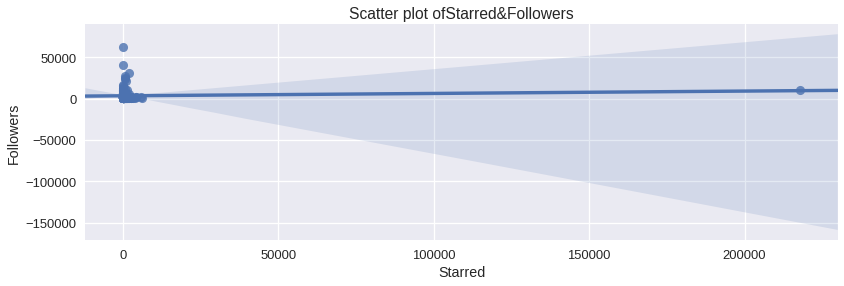

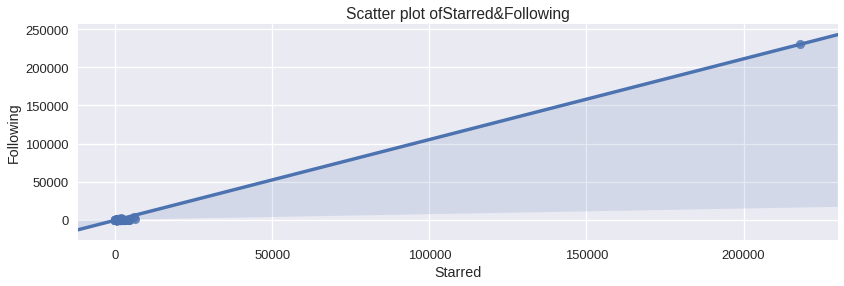

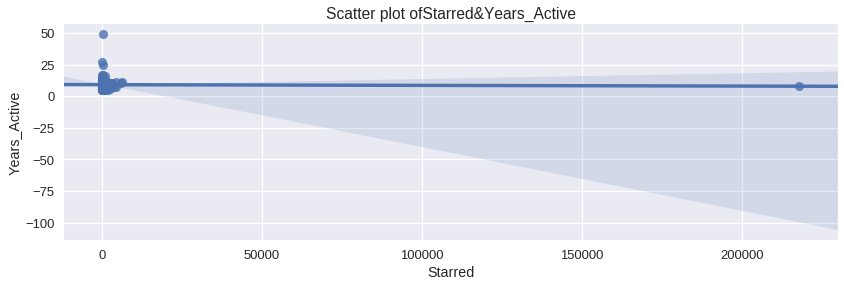

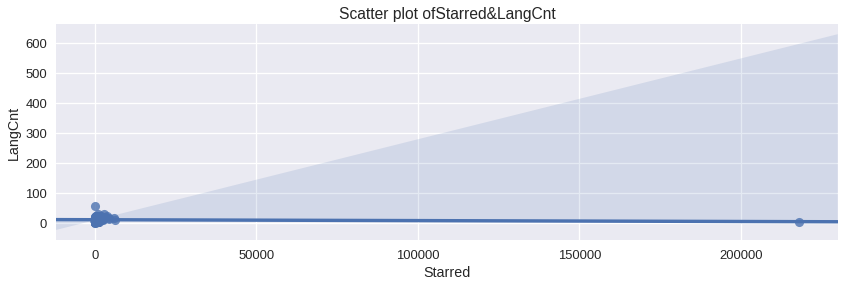

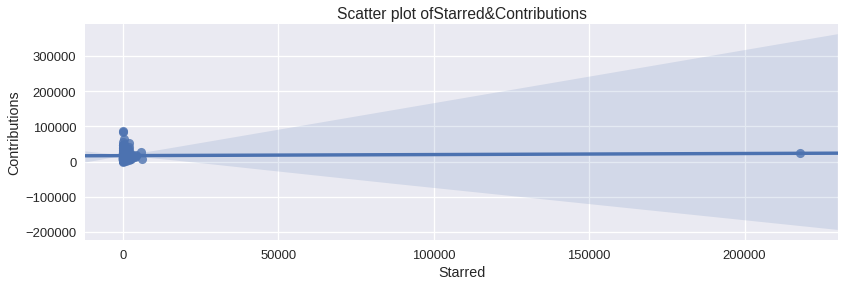

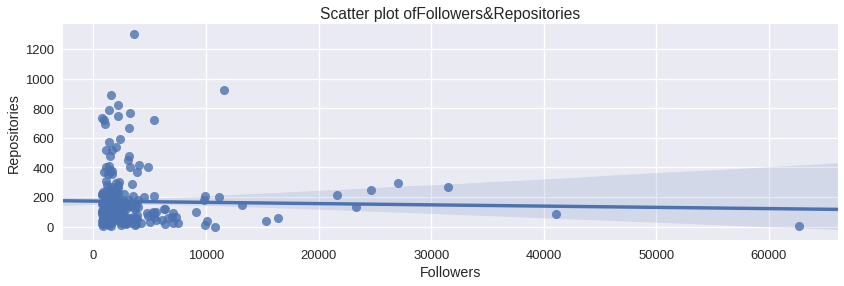

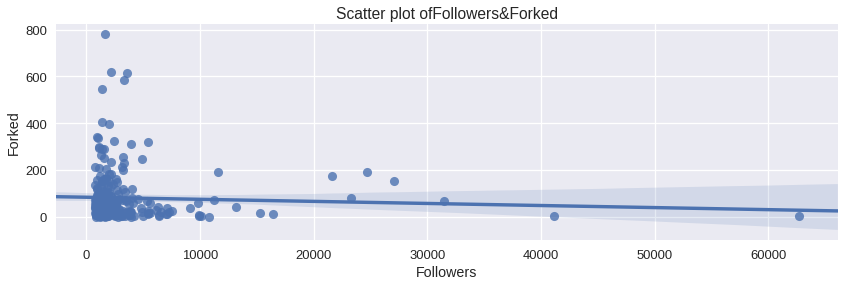

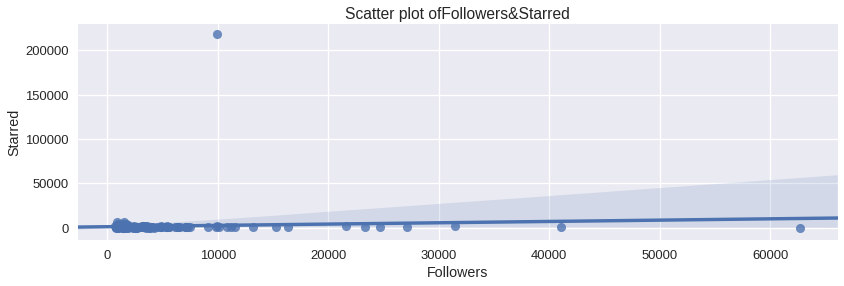

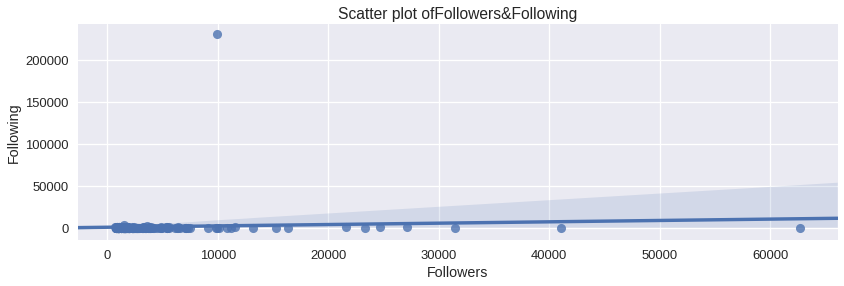

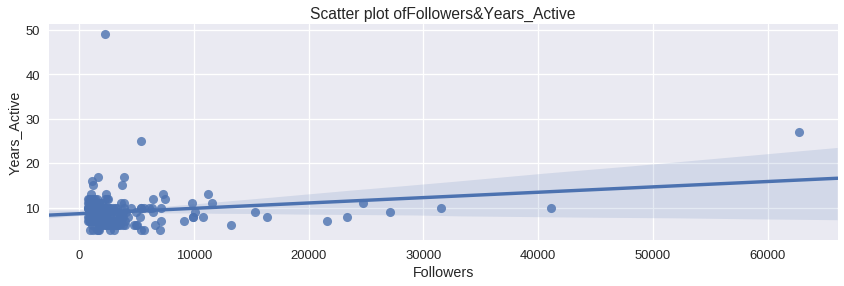

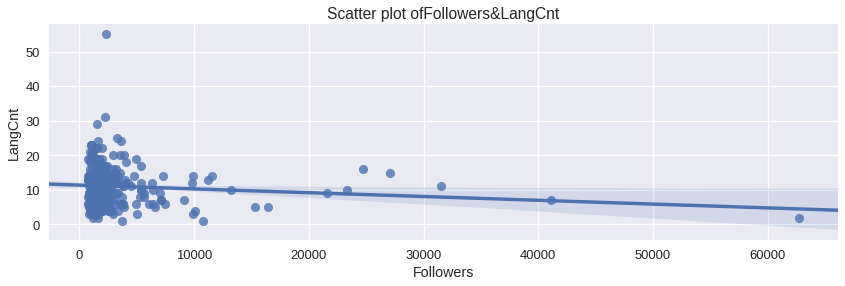

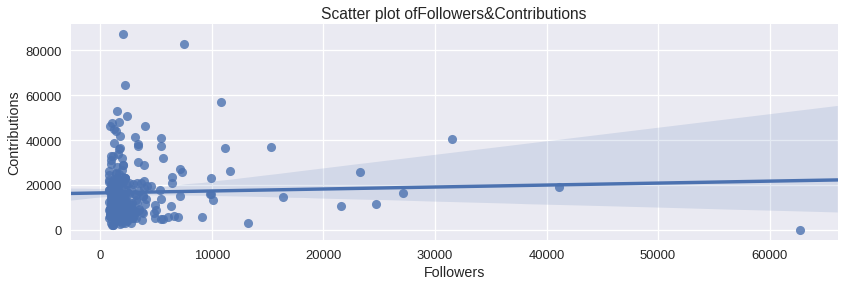

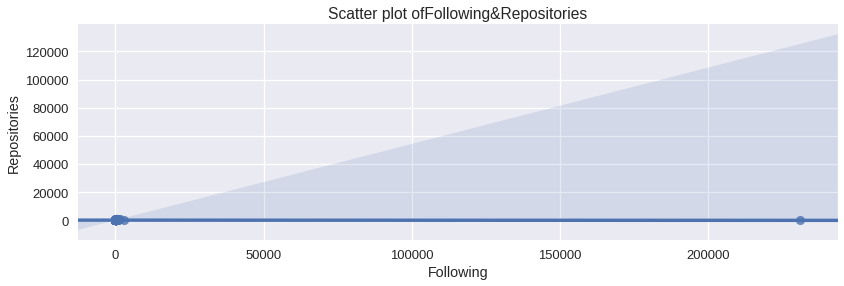

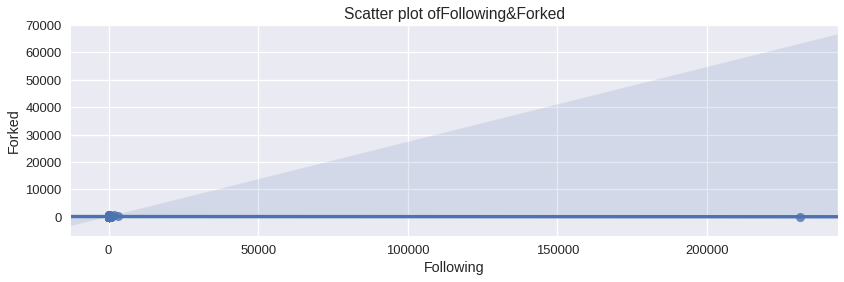

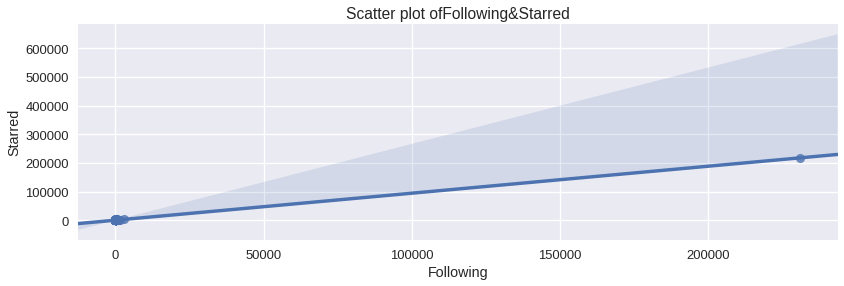

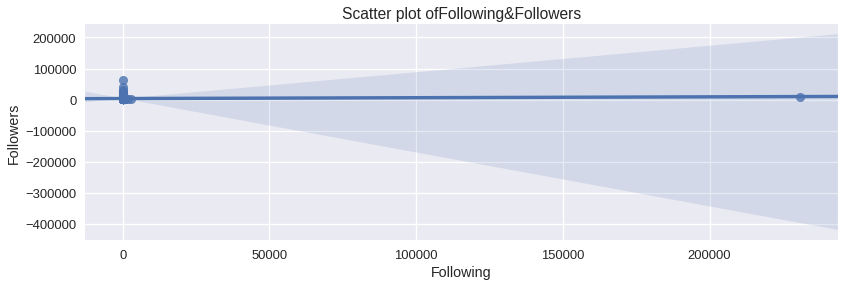

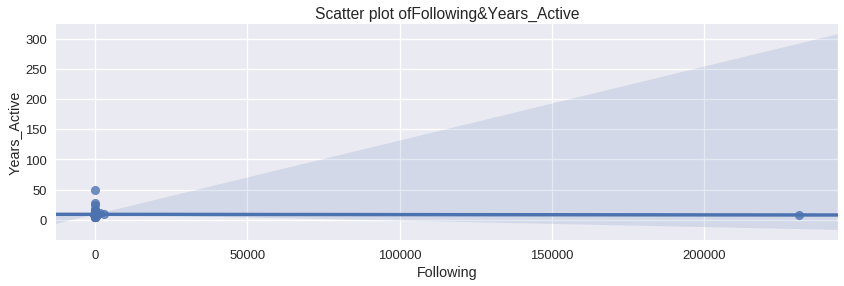

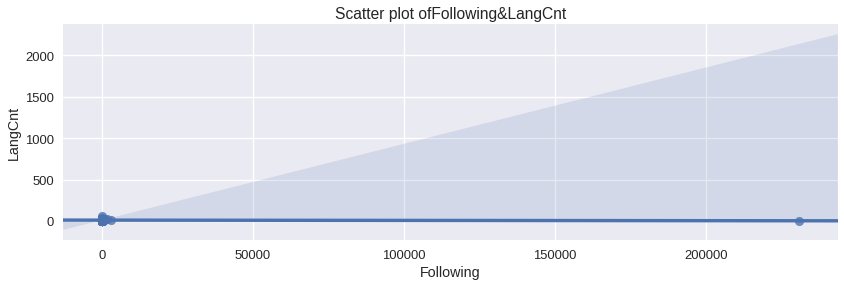

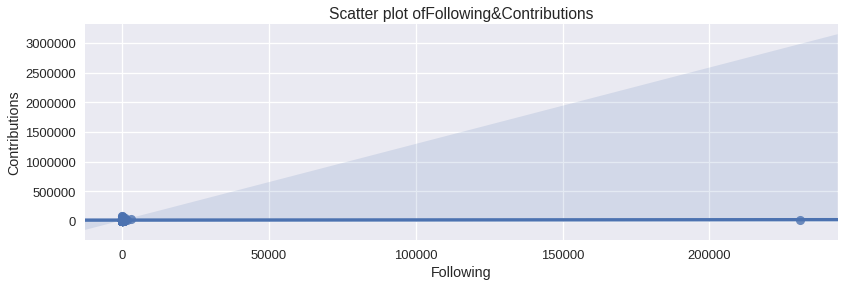

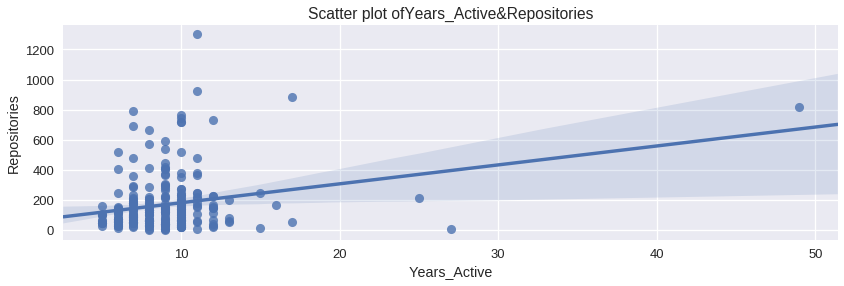

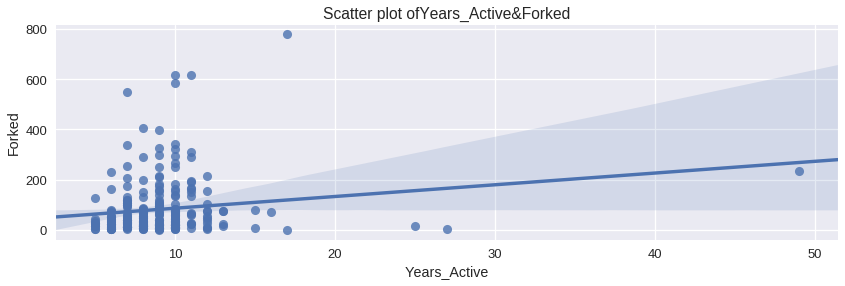

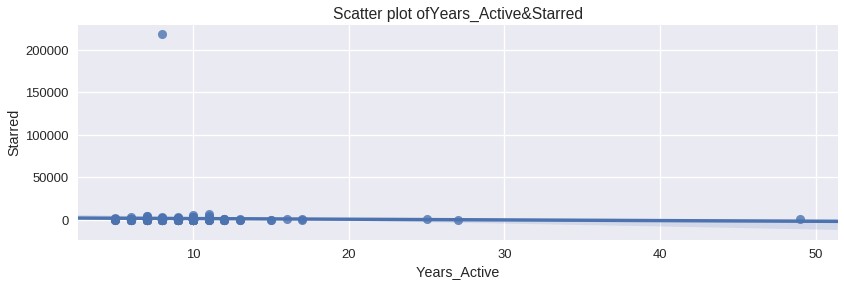

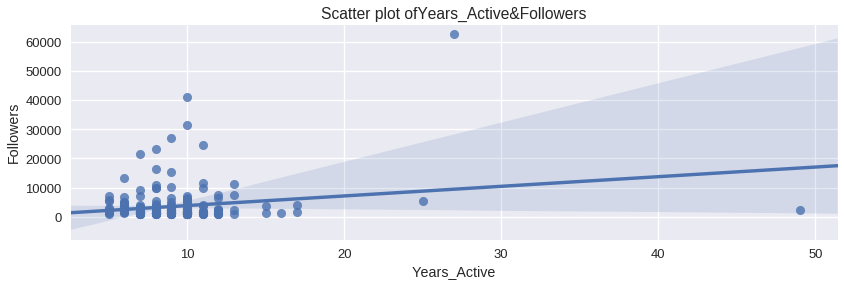

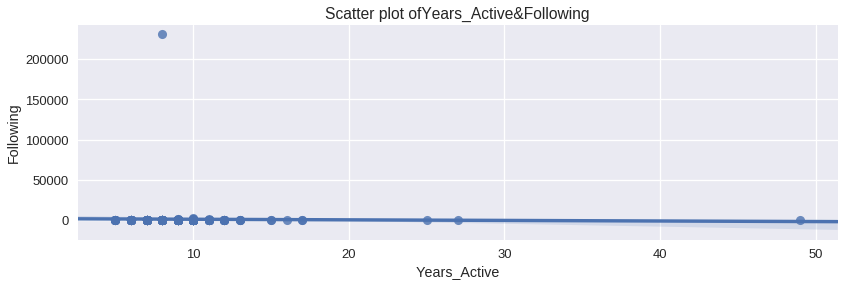

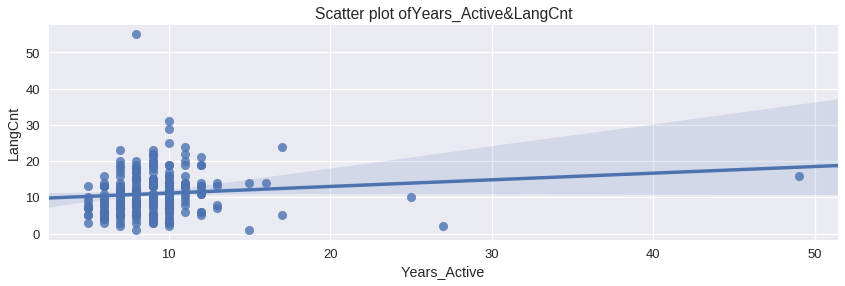

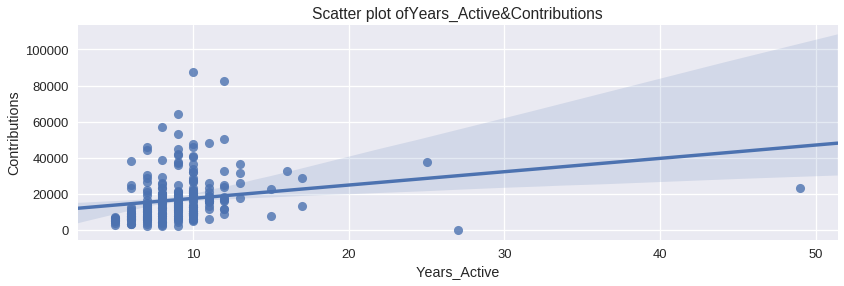

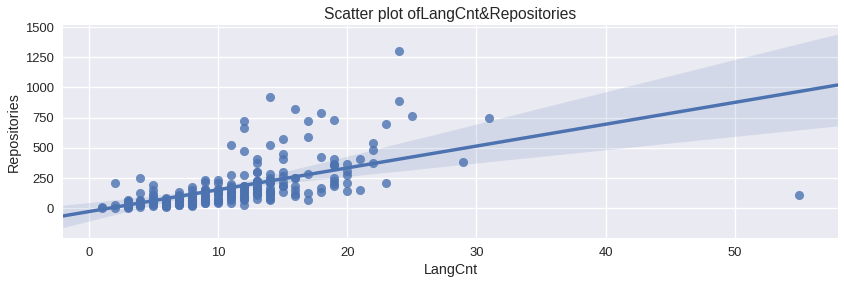

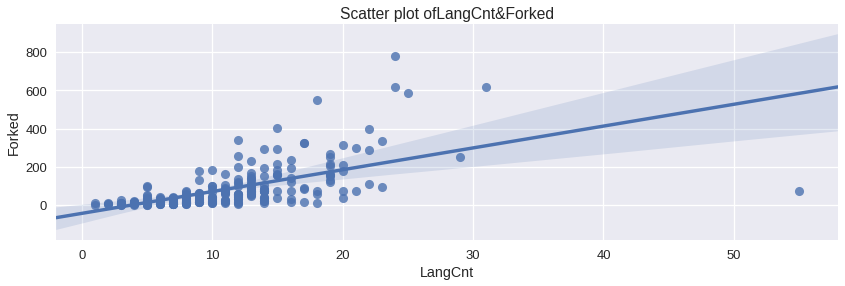

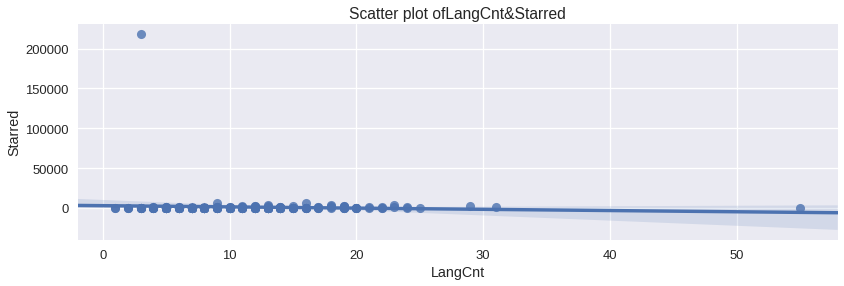

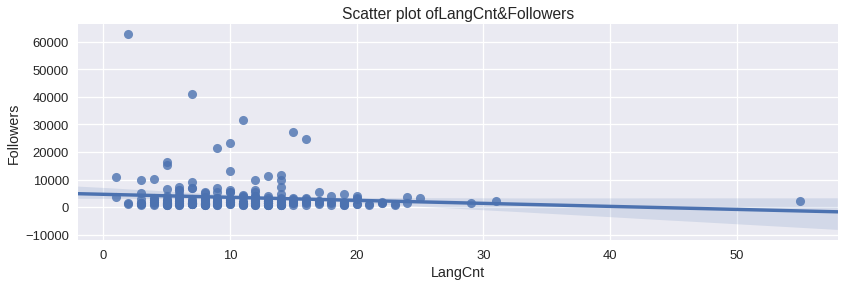

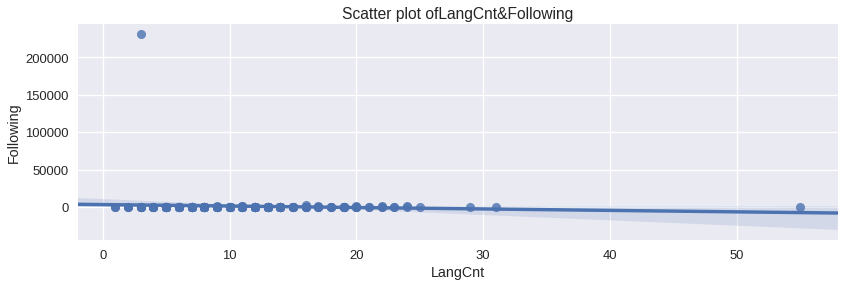

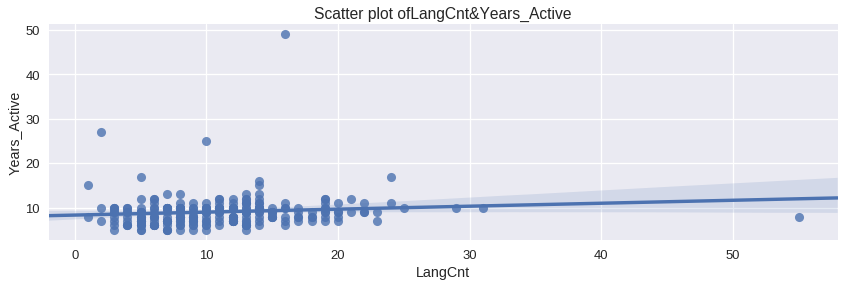

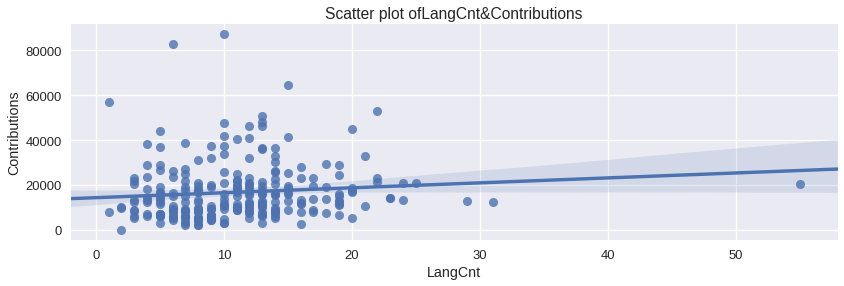

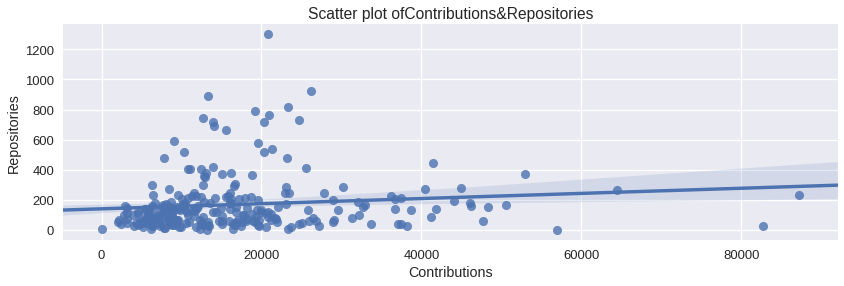

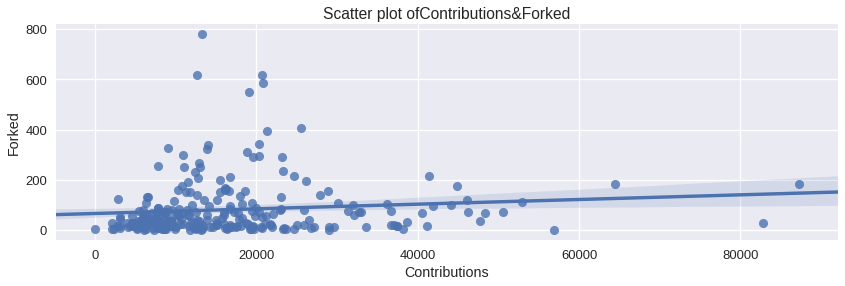

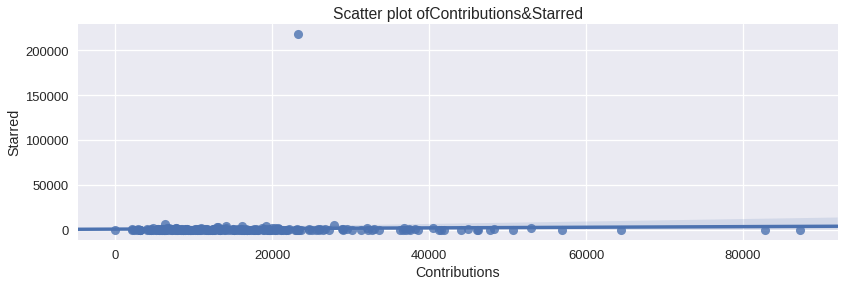

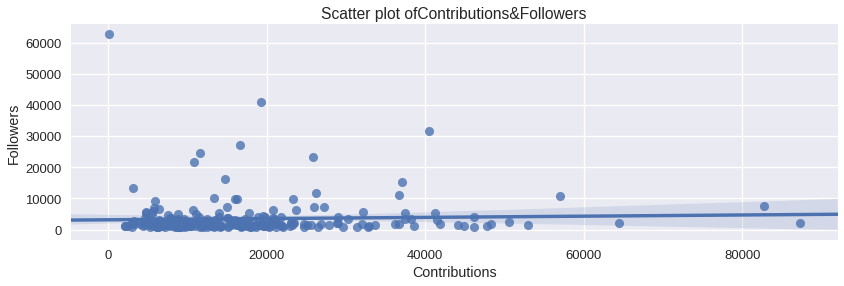

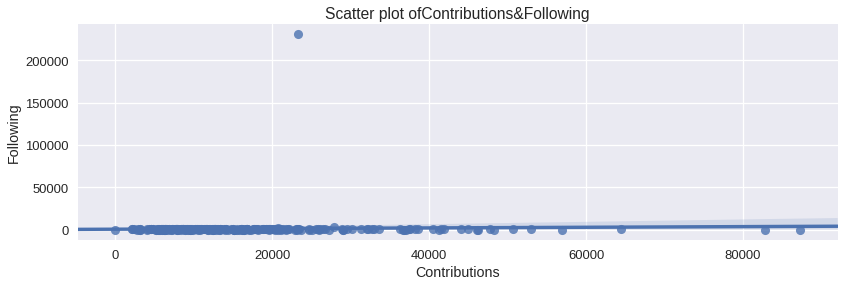

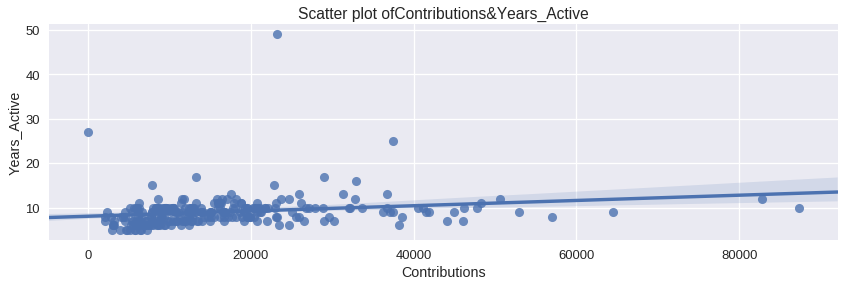

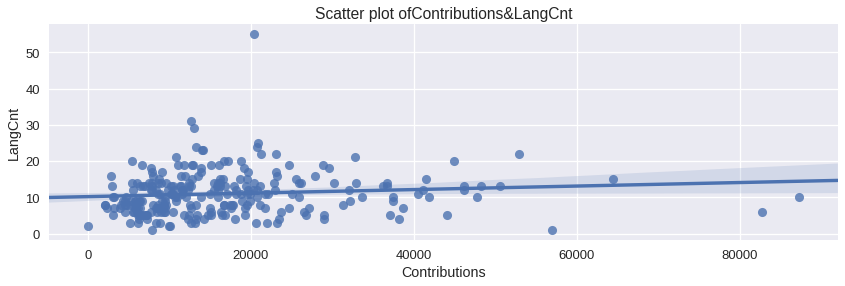

In [72]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
ff=pd.ExcelFile('/home/aronzx/Desktop/Updated_GitHub_Data.xlsx')
df=ff.parse(ff.sheet_names)
df=df[ff.sheet_names[0]]
# df['Repositories']=df['Repositories'].str.replace('k','').astype(float)*1000
def removeK(col):
    global df
    i=0
    for num in df[col]:
        if 'k' in num:
            df.loc[i,col] = float(df.loc[i,col].replace('k',''))*1000
            df.loc[i,col]=int(df.loc[i,col])
        i=i+1
removeK("Repositories")
removeK("Followers")
removeK("Following")
removeK("Starred")
# print df
def scatterPlot(colX,colY):
    df[colX] = df[colX].astype(int)
    df[colY] = df[colY].astype(int)
    dic={colX:df[colX],colY:df[colY]}
    test_frame=pd.DataFrame(dic)
    # test_frame
    # for a,b in zip(test_frame["Repositories"],test_frame["Followers"]):

    #     print int(a),int(b)
#     print test_frame
    sns.set_context("talk")
    sns.lmplot(x=colX, y=colY,data=test_frame,size=4, aspect=3)
    plt.title('Scatter plot of'+colX+'&'+colY)
    plt.xlabel(colX)
    plt.ylabel(colY)
    print test_frame.corr(method='pearson', min_periods=1)

plotList=['Repositories','Forked','Starred','Followers','Following','Years_Active','LangCnt','Contributions']
for i in plotList:
    for j in plotList:
        if i!=j:
            scatterPlot(i,j)

##Following and Starred
##Repositories and Forked
##LangCnt and Repositories
## LangCnt and Forked

In [106]:
from geotext import GeoText
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
ff=pd.ExcelFile('/home/aronzx/Desktop/Updated_GitHub_Data.xlsx')
df=ff.parse(ff.sheet_names)
df=df[ff.sheet_names[0]]
i=0
for place in df['Location']:
    places = GeoText(place)
    if places.cities:
        i=i+1
        print places.cities
print i

[u'Portland']
[u'Mountain View']
[u'Hangzhou']
[u'Saint Paul']
[u'Saint Petersburg']
[u'Worcester']
[u'Needham']
[u'Amsterdam']
[u'San Francisco']
[u'Somerset']
[u'Berkeley']
[u'San Francisco']
[u'Hsinchu']
[u'Colombo']
[u'New York']
[u'South Lake Tahoe']
[u'San Francisco']
[u'Hangzhou']
[u'Sofia']
[u'Beijing']
[u'Washington']
[u'New York City']
[u'Vancouver']
[u'San Francisco', u'Vancouver']
[u'Taipei']
[u'Portland']
[u'Ottawa']
[u'Palo Alto']
[u'San Francisco']
[u'London', u'Denver']
[u'Seattle', u'WA']
[u'Sydney']
[u'Bellevue', u'WA']
[u'New York']
[u'San Francisco']
[u'Atlanta']
[u'Minneapolis']
[u'New York']
[u'Washington']
[u'Hangzhou']
[u'Brisbane']
[u'London']
[u'San Francisco']
[u'Cambridge']
[u'San Francisco']
[u'Portland']
[u'San Francisco']
[u'San Francisco']
[u'Mountain View']
[u'Budapest']
[u'Vancouver']
[u'Mountain View']
[u'Nancy']
[u'London']
[u'San Francisco']
[u'Mountain View']
[u'Santa Clara']
[u'Bellevue', u'WA']
[u'Houston']
[u'Los Gatos']
[u'Berlin']
[u'Menlo Par

In [153]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Hangzhou")
print((location.latitude, location.longitude))
# print(location.address)
# Flatiron Building, 175, 5th Avenue, Flatiron, New York, NYC, New York, ...

# print(location.raw)
# {'place_id': '9167009604', 'type': 'attraction', ...}

(30.2489634, 120.2052342)


In [150]:
from geotext import GeoText
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from geopy.geocoders import Nominatim
ff=pd.ExcelFile('/home/aronzx/Desktop/Updated_GitHub_Data.xlsx')
df=ff.parse(ff.sheet_names)
df=df[ff.sheet_names[0]]
i=0
lat=[]
lon=[]
geolocator = Nominatim()
for place in df['Location']:
    places = GeoText(place)
    if places.cities:
        i=i+1
        print places.cities[0]
        location = geolocator.geocode(str(places.cities[0]))
        lat.append(location.latitude)
        lon.append(location.longitude)
        print((location.latitude, location.longitude))
#         p.agent_info = u' '.join((agent_contact, agent_telno)).encode('utf-8').strip()

print lat
print lon

Portland
(45.5202471, -122.6741949)
Mountain View
(37.3893889, -122.0832101)
Hangzhou
(30.2489634, 120.2052342)
Saint Paul
(43.697972, 7.1216304)
Saint Petersburg
(40.5555449, -102.8171442)
Worcester
(52.1911849, -2.2206585)
Needham
(42.283431, -71.2328329)
Amsterdam
(52.3745403, 4.89797550561798)
San Francisco
(8.444585, 125.951249185475)
Somerset
(51.083333, -3.0)
Berkeley
(37.8708393, -122.2728639)
San Francisco
(8.444585, 125.951249185475)
Hsinchu
(24.8066333, 120.9686833)
Colombo
(6.9349969, 79.853845)
New York
(40.7306458, -73.9866136)
South Lake Tahoe
(38.92933, -119.987757625037)
San Francisco
(8.444585, 125.951249185475)
Hangzhou
(30.2489634, 120.2052342)
Sofia
(-15.2538402, 48.2562163)
Beijing
(39.9059631, 116.391248)
Washington
(38.8949549, -77.0366456)
New York City
(40.7306458, -73.9866136)
Vancouver
(49.262428, -123.11554)
San Francisco
(8.444585, 125.951249185475)
Taipei
(25.0375167, 121.5637)
Portland
(45.5202471, -122.6741949)
Ottawa
(45.421106, -75.690308)
Palo Alto
(

In [152]:
import gmplot
gmap = gmplot.GoogleMapPlotter(lat[0], lon[0], 16)
gmap.scatter(lat, lon, '#00FA9A', marker=True)
gmap.draw("devMap.html")